# Exploring the available stimuli in bluecellulab

## Introduction

In this notebook, we will explore the available stimuli in bluecellulab.

In [1]:
from bluecellulab import create_ball_stick
from bluecellulab.simulation import Simulation
from bluecellulab.stimulus import StimulusFactory

import matplotlib.pyplot as plt

## Stimuli Creation

Here we create the StimulusFactory object responsible for creating various stimuli. It takes the dt parameter that represents the time between two samples.

**Note:** Any stimuli created by StimulusFactory contain a set of essential functions. This enables users to treat all stimuli the same way using those functions - without having to write specific code to analyse each stimulus object.

In [2]:
stim_factory = StimulusFactory(dt=0.1)

Later it can be used to create a step protocol as below.

In [3]:
step = stim_factory.step(start=50, end=150, amplitude=70)
step

Step(dt=0.1)

<Axes: title={'center': 'Step'}, xlabel='Time (ms)', ylabel='Current (nA)'>

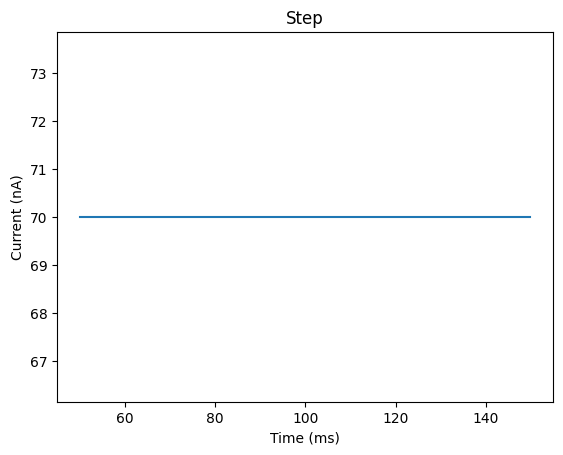

In [4]:
step.plot()

Or similarly for creating a ramp protocol.

In [5]:
ramp = stim_factory.ramp(start=20, end=180, amplitude_start=0.25, amplitude_end=0.5)
ramp

Ramp(dt=0.1)

<Axes: title={'center': 'Ramp'}, xlabel='Time (ms)', ylabel='Current (nA)'>

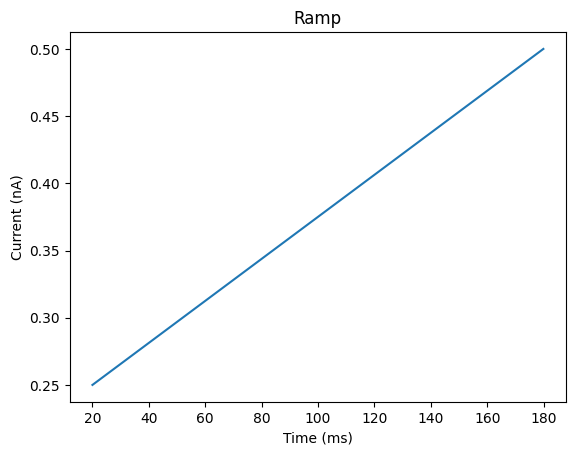

In [6]:
ramp.plot()

## Applying the Stimulus to the Neuron Model

Now let's apply the Ramp stimulus we created to a Neuron model and simulate.

### Creating the Cell (Neuron)

Next, we load a basic neuron model that we'll be using for our simulation.

In [7]:
cell = create_ball_stick()

	1 


Here we are injecting the ramp stimulus to the object.

In [8]:
cell.inject_current_waveform(t_content=ramp.time, i_content=ramp.current)

Vector[420]

In [9]:
sim = Simulation(cell)
duration = 200
print("Running the simulation...")
sim.run(duration, dt=0.1)
print("Done.")
time, voltage = cell.get_time(), cell.get_soma_voltage()

Running the simulation...
Done.


The plot below compares the voltage recorded from the cell to the current injected to the cell.

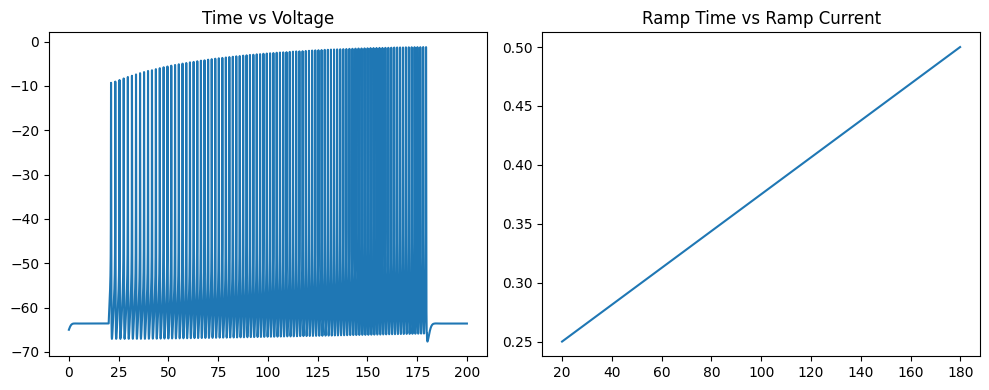

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot voltage over time on the first subplot
axs[0].plot(time, voltage)
axs[0].set_title('Time vs Voltage')

# Plot ramp current over ramp time on the second subplot
axs[1].plot(ramp.time, ramp.current)
axs[1].set_title('Ramp Time vs Ramp Current')

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

To display them on the same axis we can use the function `plot_during_simulation` to plot the current for the duration we specify.

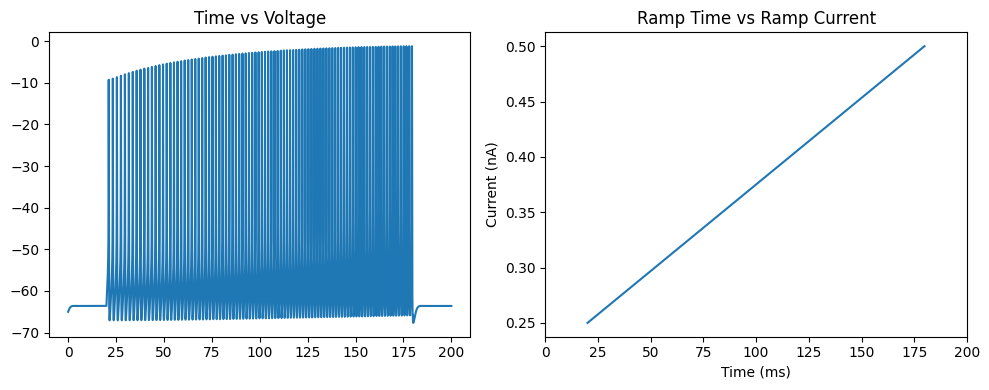

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot voltage over time on the first subplot
axs[0].plot(time, voltage)
axs[0].set_title('Time vs Voltage')

# Plot ramp current over ramp time on the second subplot
axs[1] = ramp.plot_during_simulation(duration, axs[1])
axs[1].set_title('Ramp Time vs Ramp Current')

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

In the plot above we see that the voltage activity start at the time we inject the stimulus and it lasts until the stimulus ends.

More information on the available stimuli can be found at the documentation: https://bluecellulab.readthedocs.io/en/latest/